In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

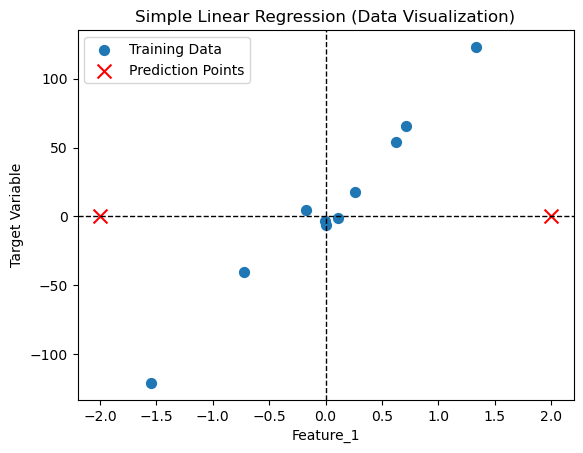

In [3]:
# Generate a simple linear regression dataset
n = 10  # Number of samples
x, y = make_regression(n_samples=n, n_features=1, n_informative=1, noise=10, random_state=10)

# Define sample input points for prediction
x_sample = np.array([[-2], [2]])

# Plot the generated data
plt.scatter(x, y, s=50, marker='o', label="Training Data")
plt.scatter(x_sample, [0, 0], s=100, marker='x', color='red', label="Prediction Points")
plt.xlabel("Feature_1")
plt.ylabel("Target Variable")
plt.title("Simple Linear Regression (Data Visualization)")
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [9]:
# Reshape target variable to a 2D array
y = y.reshape(n, 1)

# Add bias term (x0 = 1) to each instance
x_new = np.hstack([np.ones((len(x), 1)), x])

# Compute the optimal weights using the Normal Equation
w_best = np.linalg.inv(x_new.T @ x_new) @ x_new.T @ y

# Display the computed weights
print("\nOptimal weight values (w):")
print(f"w0 (bias): {w_best[0][0]:.4f}")
print(f"w1 (slope): {w_best[1][0]:.4f}")
# Add bias term to sample points
x_sample_new = np.hstack([np.ones((len(x_sample), 1)), x_sample])

# Predict values for sample input points
predicted_values = x_sample_new @ w_best

# Display predicted values
print("\nPredicted values for given inputs:")
for i, val in enumerate(x_sample.flatten()):
    print(f"x = {val:.2f} → Predicted y = {predicted_values[i][0]:.4f}")


Optimal weight values (w):
w0 (bias): 4.5518
w1 (slope): 81.1398

Predicted values for given inputs:
x = -2.00 → Predicted y = -157.7278
x = 2.00 → Predicted y = 166.8315


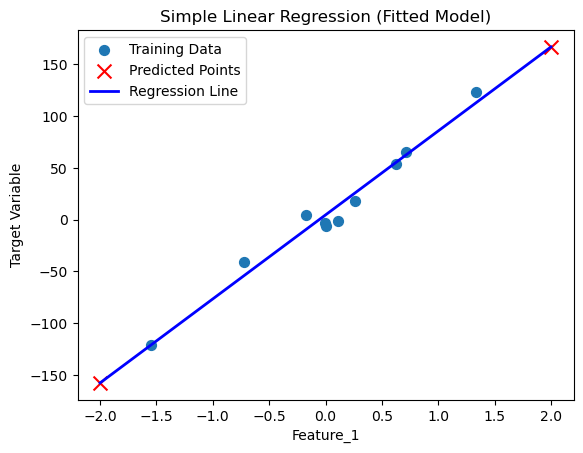

In [11]:
# Plot the regression line
plt.scatter(x, y, s=50, marker='o', label="Training Data")
plt.scatter(x_sample, predicted_values, s=100, marker='x', color='red', label="Predicted Points")
plt.plot(x_sample, predicted_values, color='blue', linestyle='-', linewidth=2, label="Regression Line")
plt.xlabel("Feature_1")
plt.ylabel("Target Variable")
plt.title("Simple Linear Regression (Fitted Model)")
plt.legend()
plt.show()

In [13]:
# Verify results using Scikit-learn's Linear Regression model
lr = LinearRegression()
lr.fit(x, y)  # Train the model

# Display obtained weight values from Scikit-learn
print("\nWeights obtained using Scikit-learn Linear Regression:")
print(f"w0 (bias): {lr.intercept_[0]:.4f}")
print(f"w1 (slope): {lr.coef_[0][0]:.4f}")

# Predict values for sample points using Scikit-learn's model
predicted_values_sklearn = lr.predict(x_sample)

# Display predicted values
print("\nPredicted values using Scikit-learn:")
for i, val in enumerate(x_sample.flatten()):
    print(f"x = {val:.2f} → Predicted y = {predicted_values_sklearn[i][0]:.4f}")


Weights obtained using Scikit-learn Linear Regression:
w0 (bias): 4.5518
w1 (slope): 81.1398

Predicted values using Scikit-learn:
x = -2.00 → Predicted y = -157.7278
x = 2.00 → Predicted y = 166.8315
